# 无人机与刚体环境的简单交互

In [1]:
import sys
sys.path.append('..')
import UAVENVmudule_design as UE

让我们来在环境中创建一些物体。并将其放置在环境中。  
我们遵守solid_base的方式创建：  
[本类为固体类，表示占据一定体积的刚体物体
    feature_information为物体类型，为一字典或列表，  
    可以为某些标准几何体("sphere"球体， "cube"正方体，"spheroid"椭球体，"cuboid"长方体)  
    如：  
    {"type":"sphere","feature_points":[[x, y, z],[r]]}表示半径为r，中心位置在[x,y,z]处的球体；  
    {"type":"cube","feature_points":[[x, y, z],[d]]}表示边长为d，中心位置在[x,y,z]处的正方体；  
    {"type":"spheroid","feature_points":[[x, y, z],[a, b, c]]}表示特征量为[a,b,c]，中心位置在[x,y,z]处的椭球体；  
    {"type":"cuboid","feature_points":[[x, y, z],[a, b, c]]}表示长宽高为[a,b,c]，中心位置在[x,y,z]处的长方体  
    也可以为某点阵("lattice")  
    如：  
    {"type":"lattice","feature_points":[[x, y, z],...]}，此时将以feature_points中点列，构建一个包络体  
    注意：此时将使用scipy.spatial中函数构造凸包]

In [2]:
cuboid1 = {"type":"cuboid","feature_points":[[10, 10, 5],[2, 2, 10]]}
cuboid2 = {"type":"cuboid","feature_points":[[10, 5, 5],[2, 2, 10]]}
cuboid3 = {"type":"spheroid","feature_points":[[20, 20, 5],[3, 4, 5]]}

让我们加载这些刚体，并绘制出来

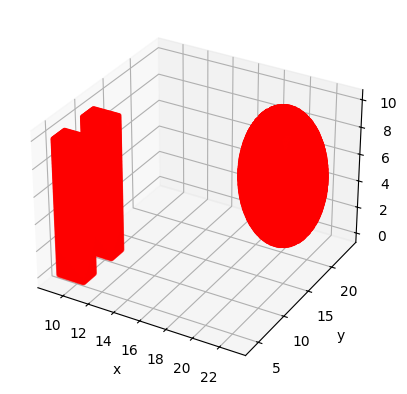

In [3]:
solid1 = UE.solid_base(cuboid1)
solid2 = UE.solid_base(cuboid2)
solid3 = UE.solid_base(cuboid3)
solid1.show_Solid()
solid1.add_scatter_solid(solid2)
solid1.add_scatter_solid(solid3)

也可将物体导入一个环境中，并显示出来。

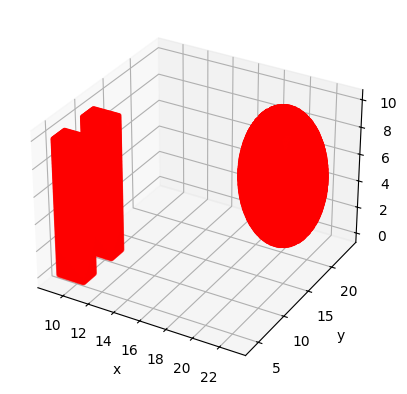

In [3]:
envlist = [cuboid1, cuboid2, cuboid3]
env = UE.solid_env(envlist)
env.show_solid_env()

让我们加载一个无人机来看看它在上述环境中的飞行过程吧。

In [4]:
UAV1 = UE.Conventional_UAV(name='test1', type='0', max_speed=10,
                            max_range=100, max_altitude=10, max_power=100, max_load=10,
                            k_up=0.5, k_down=0.1, k_around=0.3, dt=0.01, weight=2)
UAV1.points_traveled['position'] = [[0, 0, 0]]

现在让我们将某段路径设置在障碍物中，此时飞机运行时会停机碰撞点。(注意：速度若不变，输入必须为float)

In [5]:
points = [[0, 0, 5], [5, 5, 5], [11, 11, 5]]
speed = 5.

In [6]:
UAV1.travel_as_points(points, speed, obstacle=env)

obstacle crashed!, break


f:\desk\UAV_ENV_design\tasks_design\..\UAVENVmudule_design\uav_design\uav.py:57: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax1.scatter(xs=x, ys=y, zs=z, zdir='z', s=30, c="g", depthshade=True, cmap="jet", marker=".")


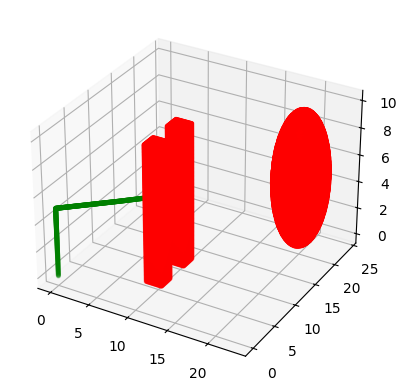

In [7]:
UAV1.scatter_points_traveled(isdynamic=False, obstacle=env)

我们可以看到此时飞机停在了“碰撞点”处

In [8]:
UAV1.points_traveled['position'][-1]

[9.015485952226502, 9.015485952226502, 4.99993252064594]

我们试试让飞机绕过两个长方体障碍物，碰撞在椭球体上边吧！

In [9]:
UAV1.reset_UAV(init_position=[[0, 0, 0]])
points = [[0, 0, 5], [5, 7.5, 5], [13, 7.5, 5], [20, 20, 5]]
speed = 5.

In [10]:
UAV1.travel_as_points(points, speed, obstacle=env)

obstacle crashed!, break


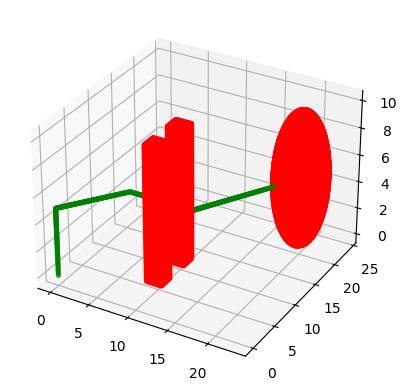

In [11]:
UAV1.scatter_points_traveled(isdynamic=False, obstacle=env)

可以看到，此时飞机停在了碰撞点处（椭球体上）

In [12]:
UAV1.points_traveled['position'][-1]

[18.21223062609044, 16.79843253711654, 5.00000012750269]